# music21: A Toolkit for Comupter-Aided Musicology

## Some examples to test basic music21 corpus functionalities

### Imports and setup

To use music21 in this notebook and python, you have to import all (\*) routines  from music21 at first with the following command.

You’ll probably get a few warnings that you’re missing some optional modules. That’s okay. If you get a warning that “no module named music21” then something probably went wrong above.

In [1]:
%matplotlib inline     # imports the matplot library to plot graphs etc.

from music21 import *

Probably you have to set manually the correct file path to an Application that is able to open MusicXML files (like MuseScore). To do so, you can use the `music21.environment` module where you can set an `musicxmlPath` key.

Make sure to change below the string `path/to/your/musicXmlApplication` with the correct file path (keep the quotation marks):
- on Mac e.g.: `/Applications/MuseScore 2.app/Contents/MacOS/mscore` 
- or on Windows e.g.: `C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe`) 

and uncomment the line (remove the `#` at the begin of the line).

In the same way, you can also add a path to your lilypond installation, using
`env['lilypondPath']`:
- on Mac e.g.: `Applications/Lilypond.app`
- on Windows e.g.: `C:/Program Files (x86)/LilyPond/usr/bin/lilypond.exe`

In [6]:
env = environment.Environment()
# env['musicxmlPath'] = 'path/to/your/musicXmlApplication'
# env['lilypondPath'] = 'path/to/your/lilypond'
# env['musescoreDirectPNGPath'] = 'path/to/your/MuseScore'

print('Environment settings:')
print('musicXML: ', env['musicxmlPath'])
print('lilypond: ', env['lilypondPath'])
print('musescore: ', env['musescoreDirectPNGPath'])

Environment settings:
musicXML:  C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe
lilypond:  C:\Program Files (x86)\LilyPond\usr\bin\lilypond.exe
musescore:  C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe


## Starting with corpus examples

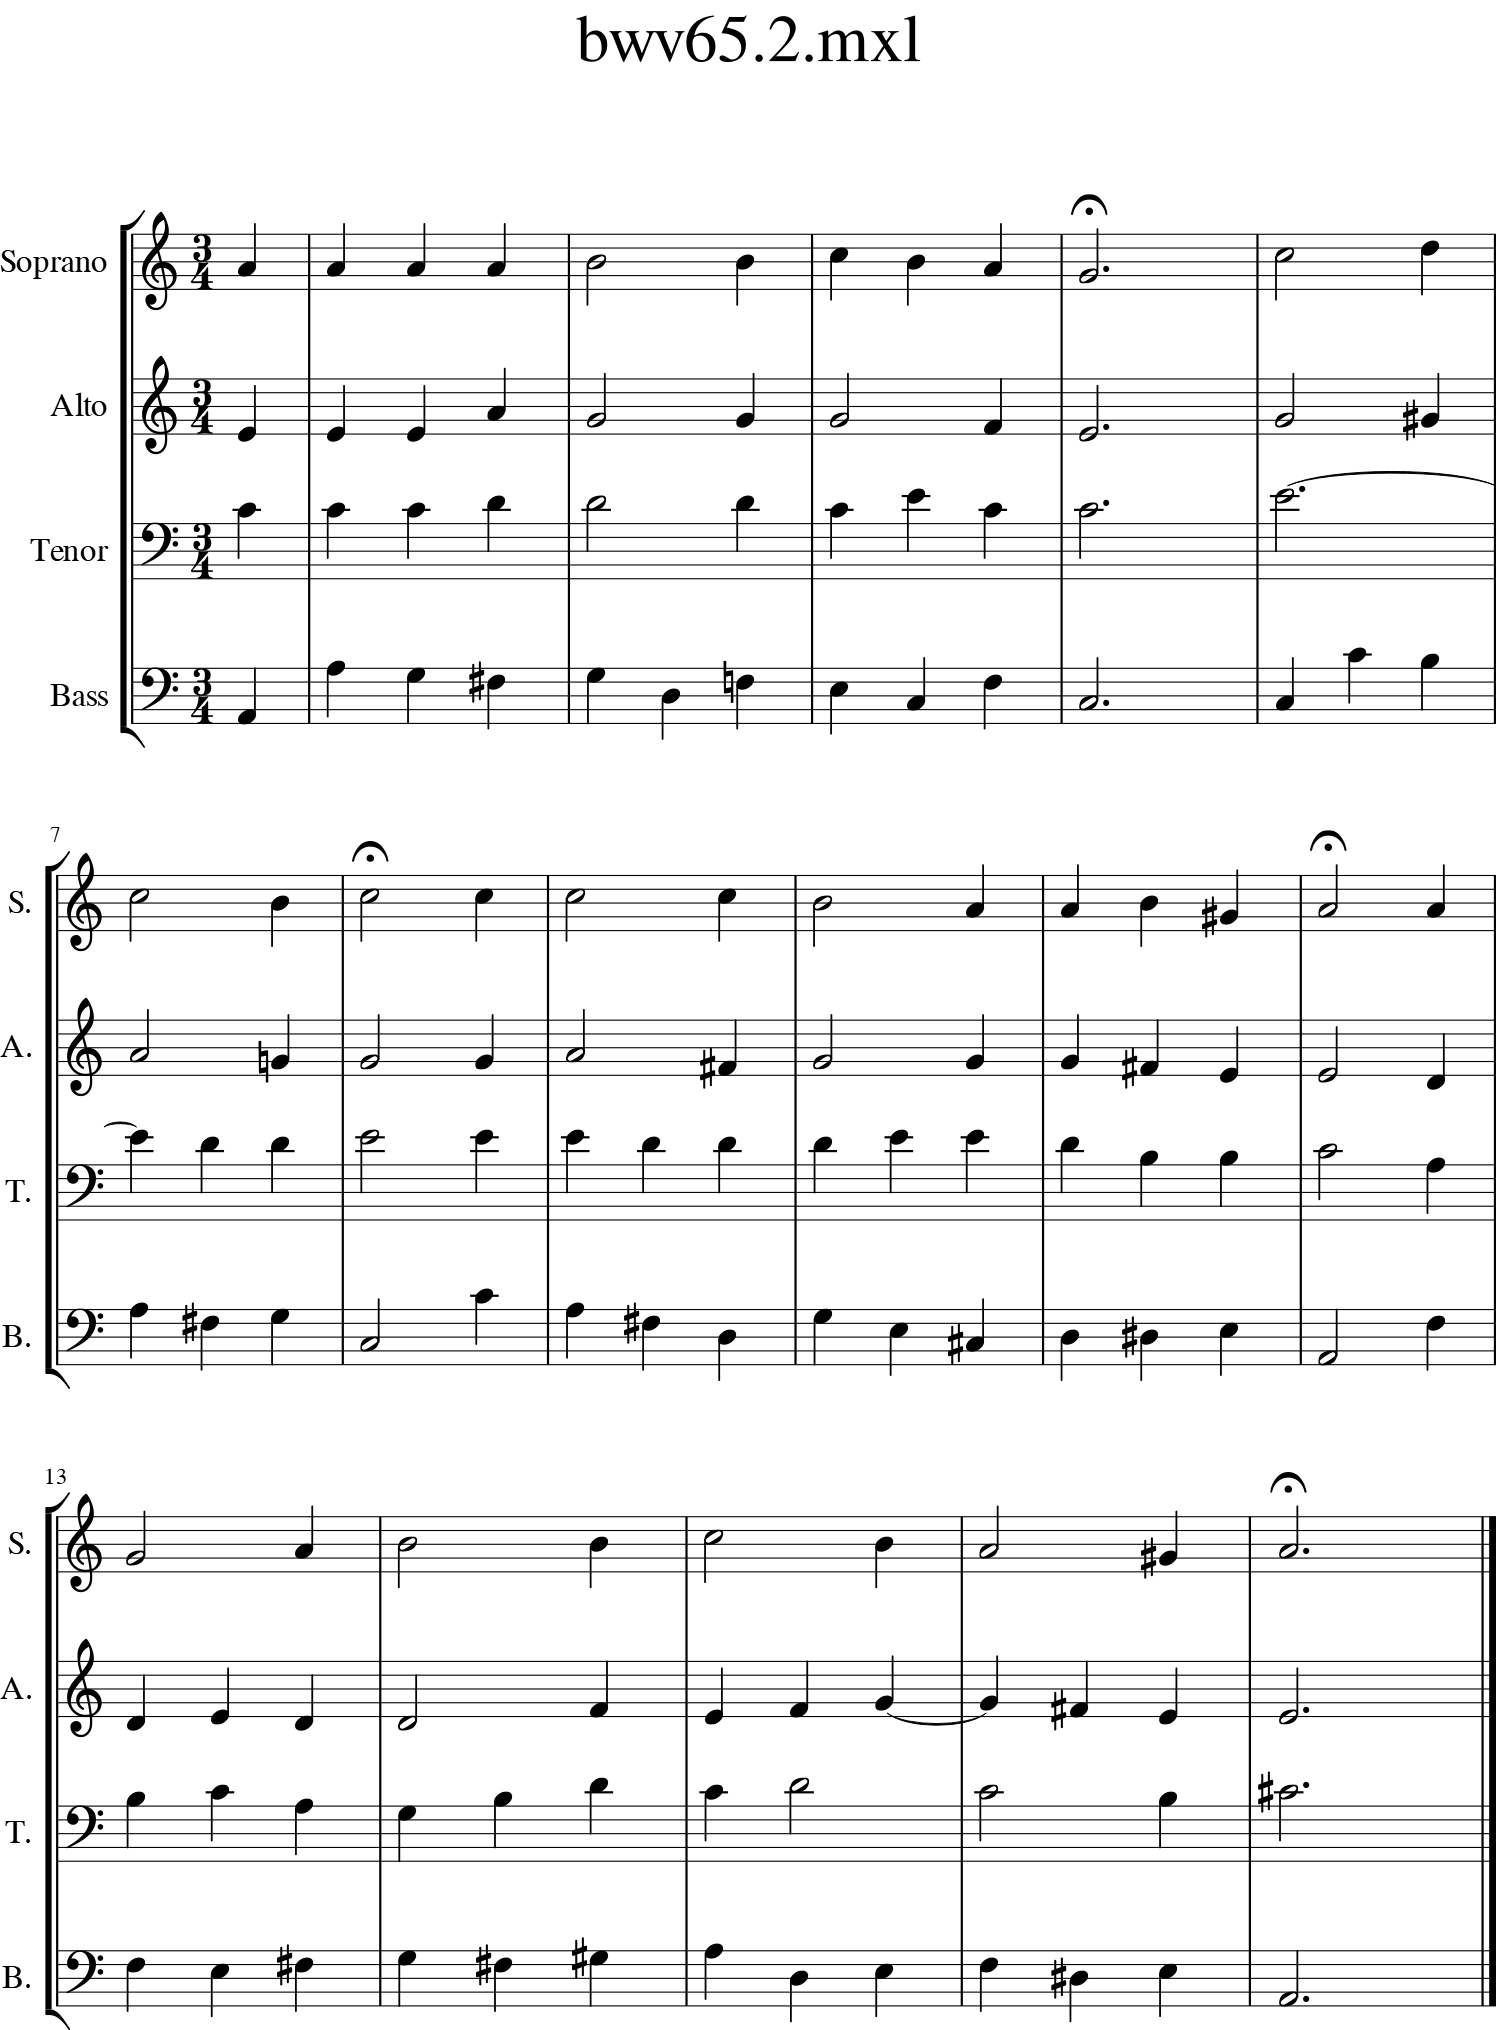

In [67]:
s = corpus.parse('bach/bwv65.2.xml')
s.show()

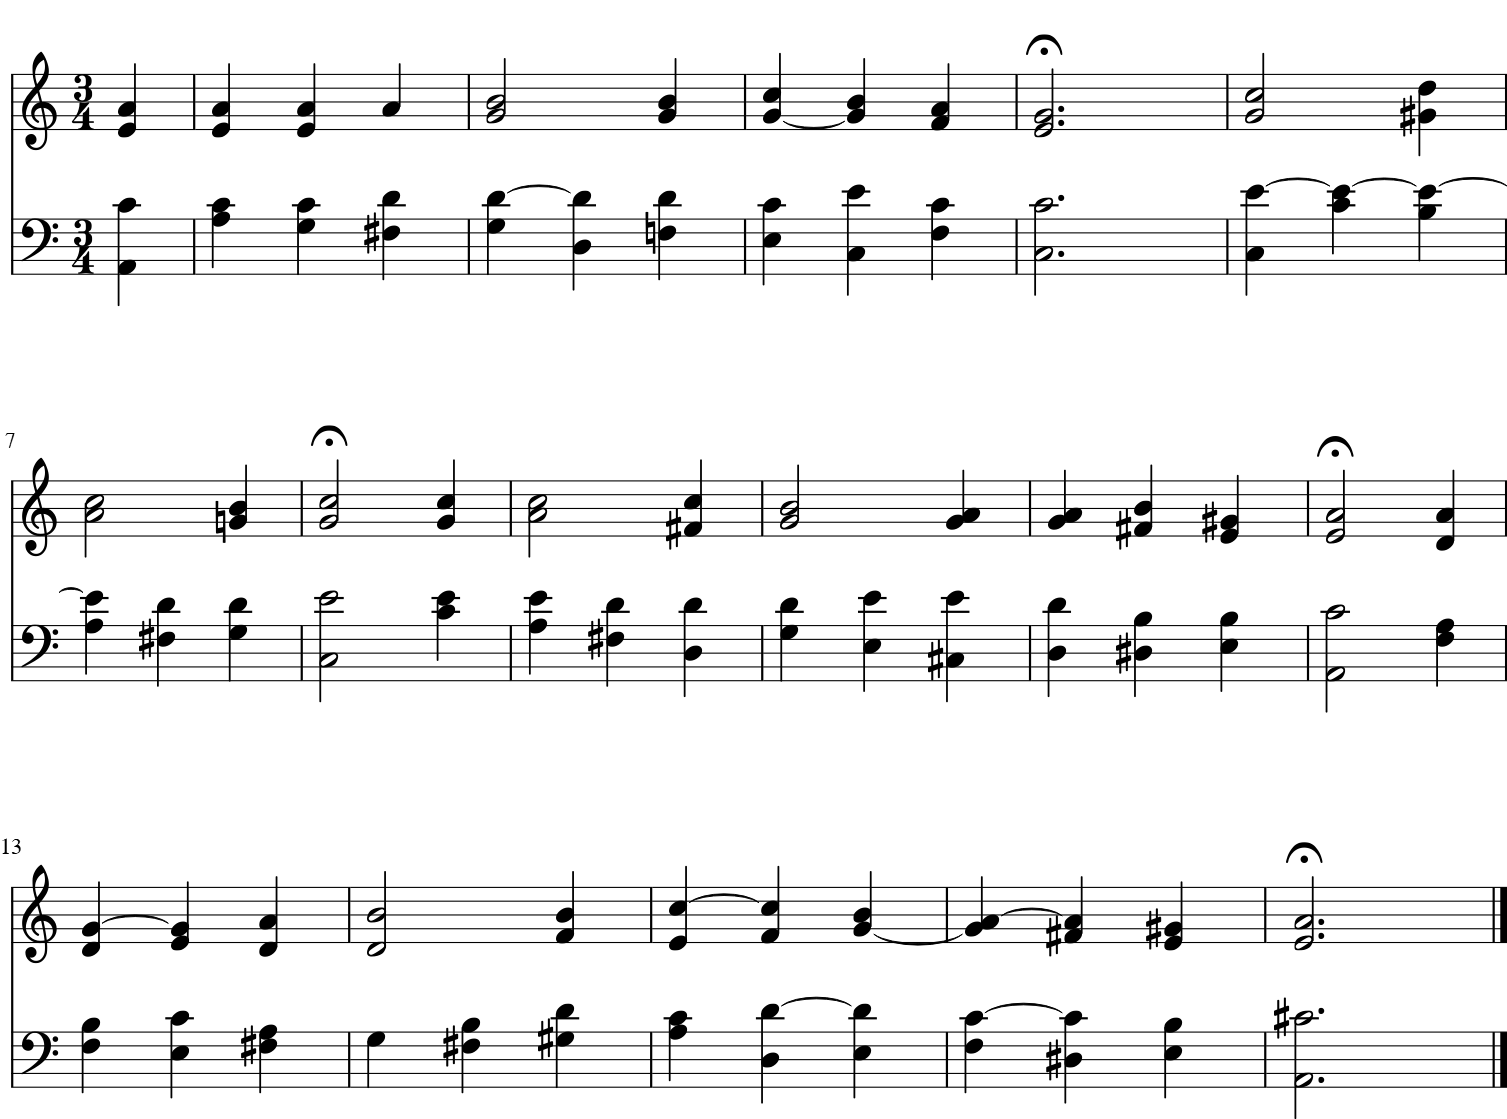

In [68]:
fVoices = stream.Score((s.parts['Soprano'], s.parts['Alto'])).chordify()
mVoices = stream.Score((s.parts['Tenor'], s.parts['Bass'])).chordify()

chorale2p = stream.Score((fVoices, mVoices))
chorale2p.show()

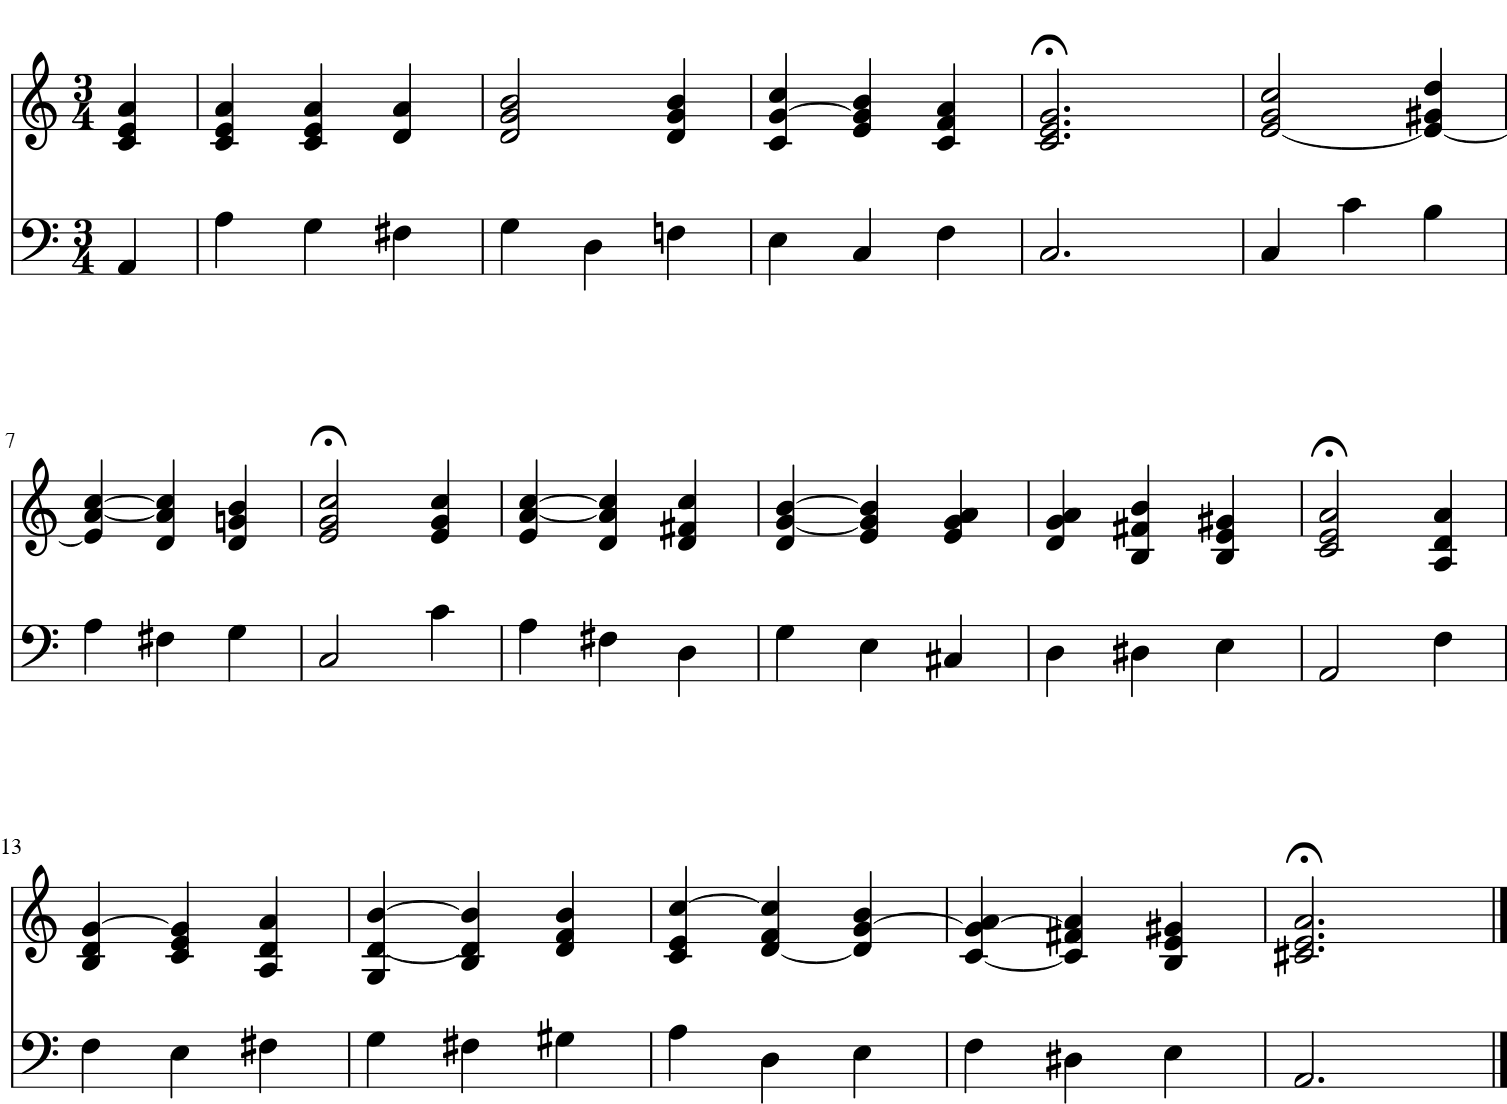

In [69]:
upperVoices = stream.Score((s.parts['Soprano'], s.parts['Alto'], s.parts['Tenor'])).chordify()
bass = stream.Score((s.parts['Bass'])).chordify()

chorale3p = stream.Score((upperVoices, bass))
chorale3p.show()


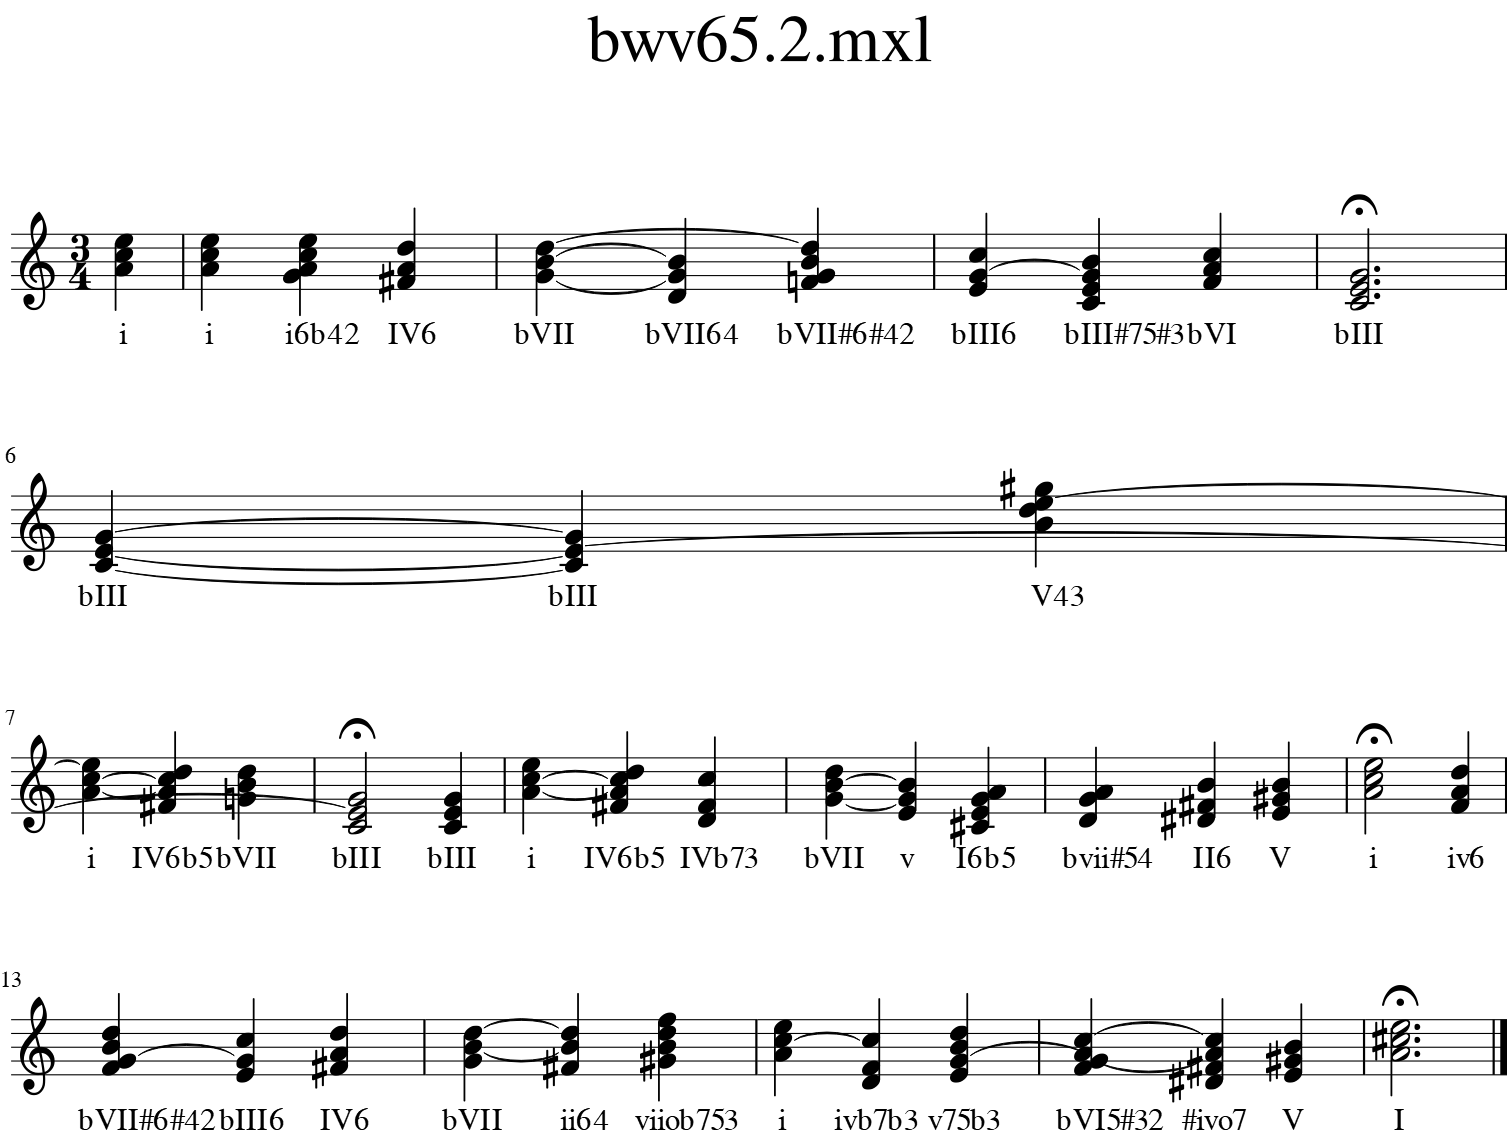

In [70]:
choraleChords = chorale3p.chordify()

for c in choraleChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

choraleChords.show()

## Another example

In [4]:
p = corpus.parse('bach/bwv846.xml')
p.show()

SubConverterException: Cannot find a path to the 'mscore' file at C:\Program Files (x86)\MuseScore 2\MuseScore.exe -- download MuseScore

In [4]:
p.analyze('key')

<music21.key.Key of C major>

In [5]:
p.show('text')

{0.0} <music21.text.TextBox "Prelude I">
{0.0} <music21.text.TextBox "In C major">
{0.0} <music21.text.TextBox "Johann Seb...">
{0.0} <music21.text.TextBox "BWV 846">
{0.0} <music21.metadata.Metadata object at 0x1136c7fd0>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument P1: Piano: Piano>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.expressions.TextExpression "Adagio">
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Rest rest>
        {0.5} <music21.note.Note G>
        {0.75} <music21.note.Note C>
        {1.0} <music21.note.Note E>
        {1.25} <music21.note.Note G>
        {1.5} <music21.note.Note C>
        {1.75} <music21.note.Note E>
        {2.0} <music21.note.Rest rest>
        {2.5} <music21.note.Note G>
        {2.75} <music21.note.Note C>
        {3.0} <music21

In [38]:
len(p.parts)

2

In [7]:
len(p.flat.notes)

598

In [45]:
post = p.flattenParts('Note')
post.show('text')

{0.0} <music21.instrument.Instrument P1: Piano: Piano>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
{4.0} <music21.stream.Measure 2 offset=4.0>

{8.0} <music21.stream.Measure 3 offset=8.0>

{12.0} <music21.stream.Measure 4 offset=12.0>
    {0.0} <music21.layout.SystemLayout>
{16.0} <music21.stream.Measure 5 offset=16.0>

{20.0} <music21.stream.Measure 6 offset=20.0>

{24.0} <music21.stream.Measure 7 offset=24.0>
    {0.0} <music21.layout.SystemLayout>
{28.0} <music21.stream.Measure 8 offset=28.0>

{32.0} <music21.stream.Measure 9 offset=32.0>

{36.0} <music21.stream.Measure 10 offset=36.0>
    {0.0} <music21.layout.SystemLayout>
{40.0} <music21.stream.Measure 11 offset=40.0>

{44.0} <music21.stream.Measure 12 offset=44.0>

{48.0} <music21.stream.Measure 13 offset=48.0>
    {0.0} <music21.layout.SystemLayout>
{52.0} <music21.stream

In [7]:
mChord = chord.Chord()
#for m in p.recurse().getElementsByClass('Measure'):

for el in p.flat.notes:
    tup = (el, el.offset, el.activeSite)
    print(tup)

#for m in p.measures(1,6):    
 #   flatNotes = m.flat.notes
 #   flatNotes.show('text')
 #   for flatNote in flatNotes:
 #        mChord.add(flatNote)
 #   rem = mChord.removeRedundantPitchClasses()
 #   bChord.show('text')
    #flatChords = e.chordify()
    #bChords.app
    #print(flatNotes)
    #flatNotes.show()
    print('-----')



(<music21.note.Note C>, 0.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 0.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 0.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 0.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 1.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 1.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 2.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 2.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 2.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 2.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<musi

In [11]:
graph.findPlot.FORMATS

['horizontalbar',
 'histogram',
 'scatter',
 'scatterweighted',
 '3dbars',
 'colorgrid',
 'horizontalbarweighted']

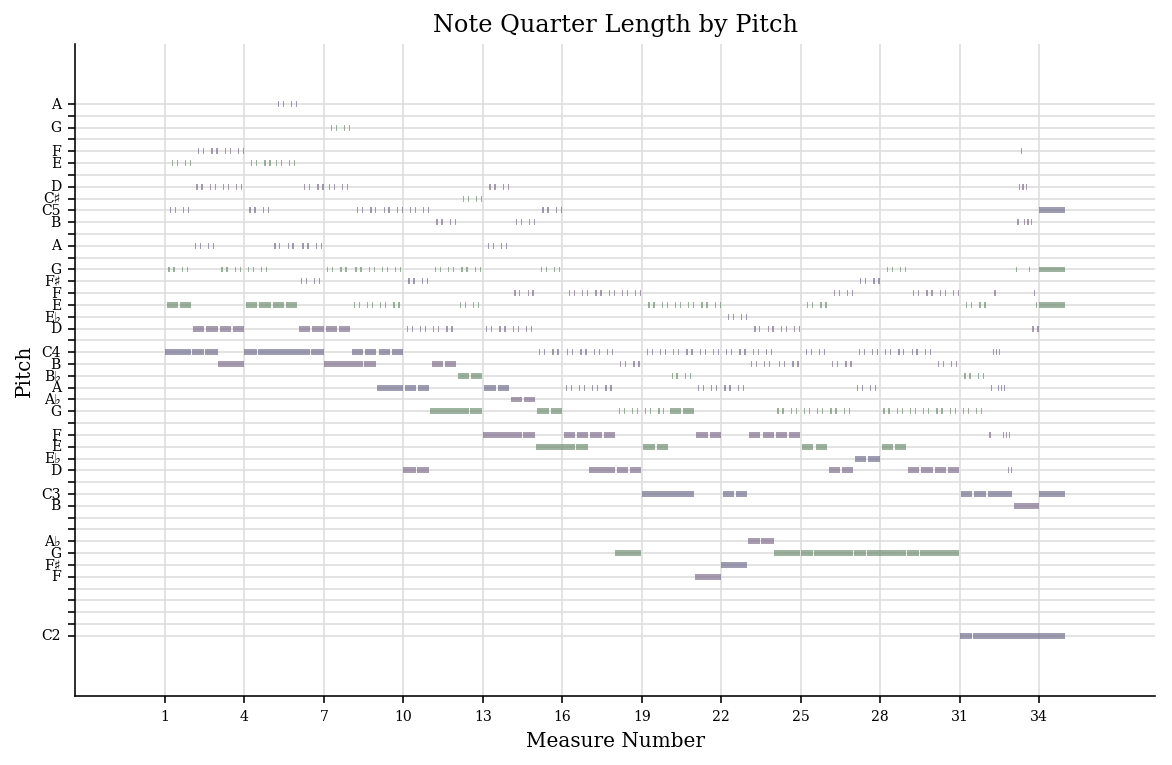

In [16]:
p.plot('pianoroll')

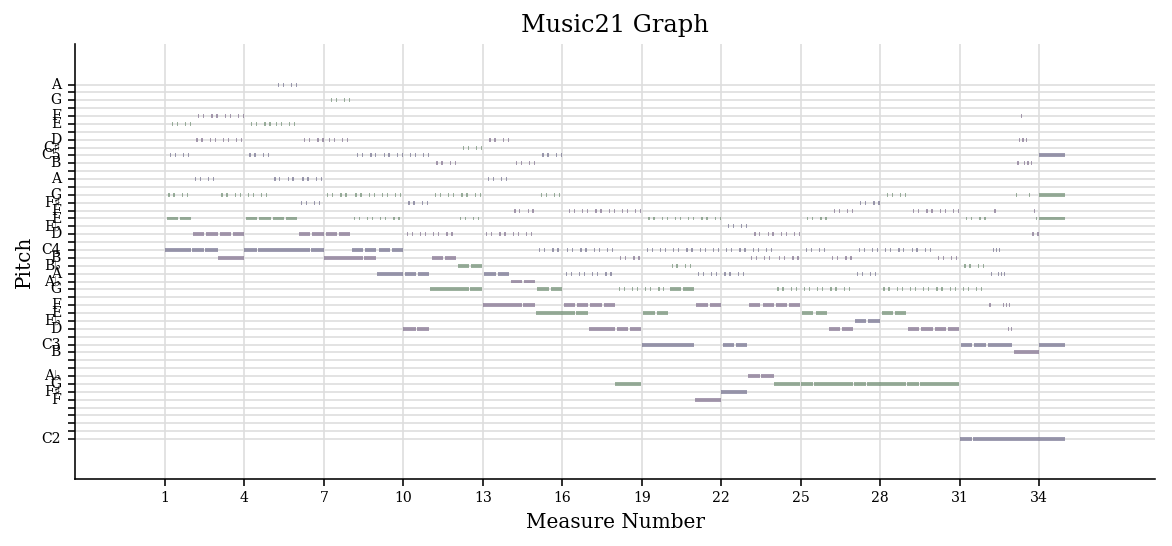

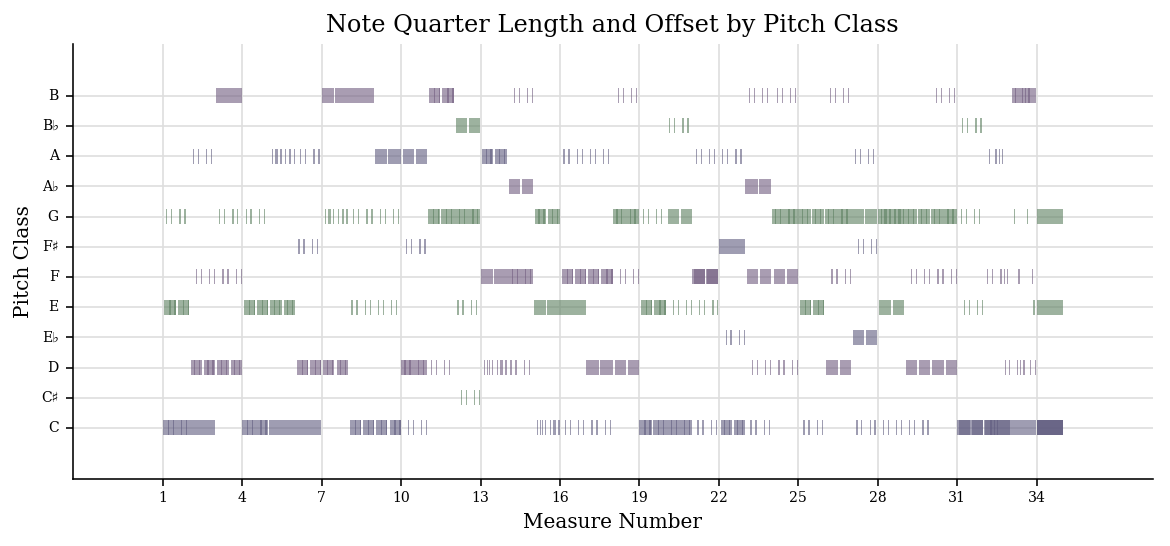

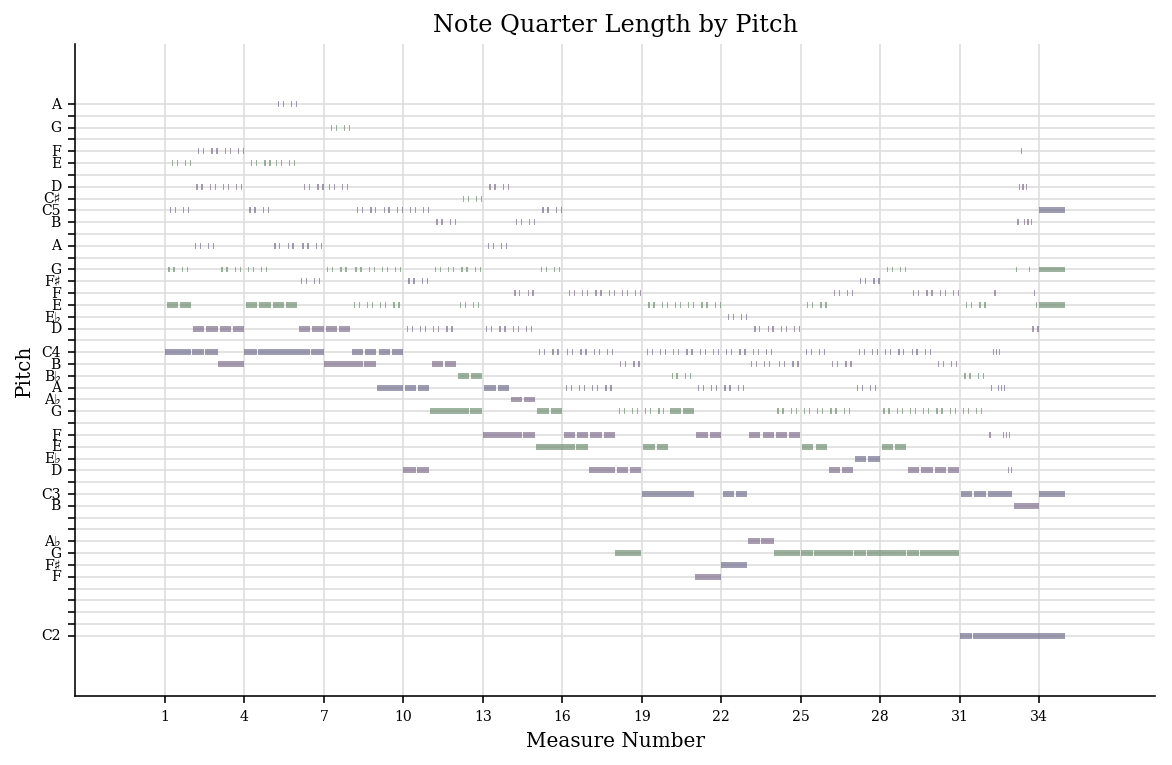

In [10]:
p.plot('horizontalbar')